*PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.*

*PyCaret Installation*

In [3]:
!pip install pycaret
import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

'3.3.2'

*Loading sample dataset from pycaret dataset module*

In [6]:
from pycaret.datasets import get_data
data = get_data('bank')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


*Setup function initializes the training environment and creates the transformation pipeline. This function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target*

*Using Functional API : Import pycaret classification and init setup*

In [7]:
from pycaret.classification import *
s = setup(data, target = 'education', session_id = 123)

,Description,Value
0,Session id,123
1,Target,education
2,Target type,Multiclass
3,Target mapping,"primary: 0, secondary: 1, tertiary: 2, unknown: 3"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 46)"
6,Transformed train set shape,"(31647, 46)"
7,Transformed test set shape,"(13564, 46)"
8,Numeric features,7
9,Categorical features,9


*With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.*

In [8]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
type(exp)

pycaret.classification.oop.ClassificationExperiment

***Inital setup on exp: *** _This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: data and target. All the other parameters are optional and are used for configuring data preprocessing pipeline._

In [9]:
exp.setup(data, target = 'education', session_id = 123)

,Description,Value
0,Session id,123
1,Target,education
2,Target type,Multiclass
3,Target mapping,"primary: 0, secondary: 1, tertiary: 2, unknown: 3"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 46)"
6,Transformed train set shape,"(31647, 46)"
7,Transformed test set shape,"(13564, 46)"
8,Numeric features,7
9,Categorical features,9


**Compare Models** : *This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores.*

*Compare baseline models*

In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6853,0.0000,0.6853,0.6712,0.6627,0.4566,0.4687,21.0650
lightgbm,Light Gradient Boosting Machine,0.6845,0.8299,0.6845,0.6695,0.6638,0.4595,0.4686,5.7350
catboost,CatBoost Classifier,0.6838,0.8287,0.6838,0.6691,0.6642,0.4605,0.4685,28.4360
xgboost,Extreme Gradient Boosting,0.6810,0.8245,0.6810,0.6650,0.6617,0.4562,0.4638,3.0800
ridge,Ridge Classifier,0.6788,0.0000,0.6788,0.6541,0.6371,0.4312,0.4526,0.5440
ada,Ada Boost Classifier,0.6769,0.0000,0.6769,0.6647,0.6621,0.4566,0.4612,1.9800
rf,Random Forest Classifier,0.6743,0.8159,0.6743,0.6584,0.6545,0.4446,0.4521,6.3240
lda,Linear Discriminant Analysis,0.6717,0.0000,0.6717,0.6694,0.6684,0.4656,0.4670,0.6310
et,Extra Trees Classifier,0.6554,0.7987,0.6554,0.6362,0.6409,0.4228,0.4262,7.4440
lr,Logistic Regression,0.6399,0.0000,0.6399,0.5964,0.5768,0.3359,0.3778,12.1460


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

*Compare models using OOP*

In [9]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6853,0.0000,0.6853,0.6712,0.6627,0.4566,0.4687,21.0230
lightgbm,Light Gradient Boosting Machine,0.6845,0.8299,0.6845,0.6695,0.6638,0.4595,0.4686,5.1670
xgboost,Extreme Gradient Boosting,0.6810,0.8245,0.6810,0.6650,0.6617,0.4562,0.4638,2.9950
ridge,Ridge Classifier,0.6788,0.0000,0.6788,0.6541,0.6371,0.4312,0.4526,0.5690
ada,Ada Boost Classifier,0.6769,0.0000,0.6769,0.6647,0.6621,0.4566,0.4612,1.9860
rf,Random Forest Classifier,0.6743,0.8159,0.6743,0.6584,0.6545,0.4446,0.4521,6.1490
lda,Linear Discriminant Analysis,0.6717,0.0000,0.6717,0.6694,0.6684,0.4656,0.4670,0.9150
et,Extra Trees Classifier,0.6554,0.7987,0.6554,0.6362,0.6409,0.4228,0.4262,6.7650
lr,Logistic Regression,0.6399,0.0000,0.6399,0.5964,0.5768,0.3359,0.3778,9.2970
nb,Naive Bayes,0.6109,0.7964,0.6109,0.6512,0.6171,0.4201,0.4303,0.5520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Analyze Model** : *You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.*

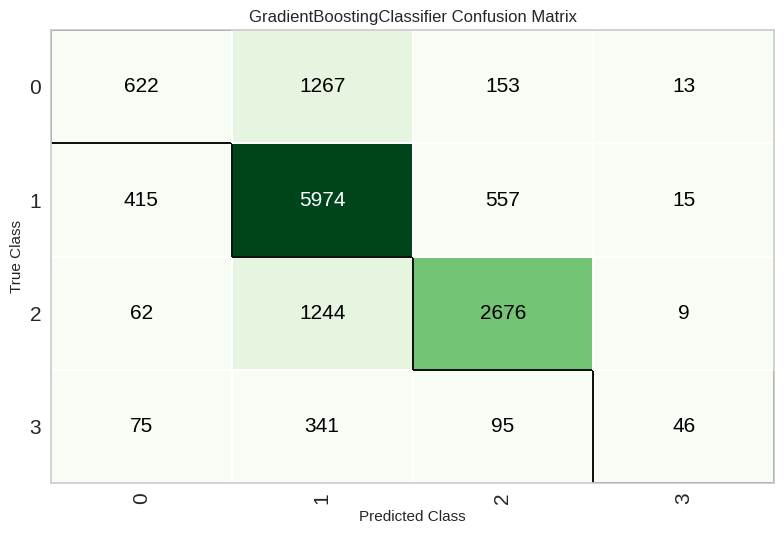

In [10]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

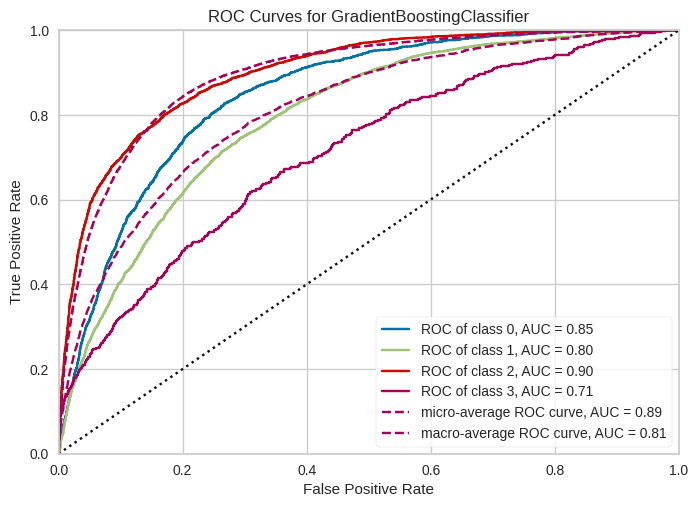

In [11]:
# plot AUC
plot_model(best, plot = 'auc')

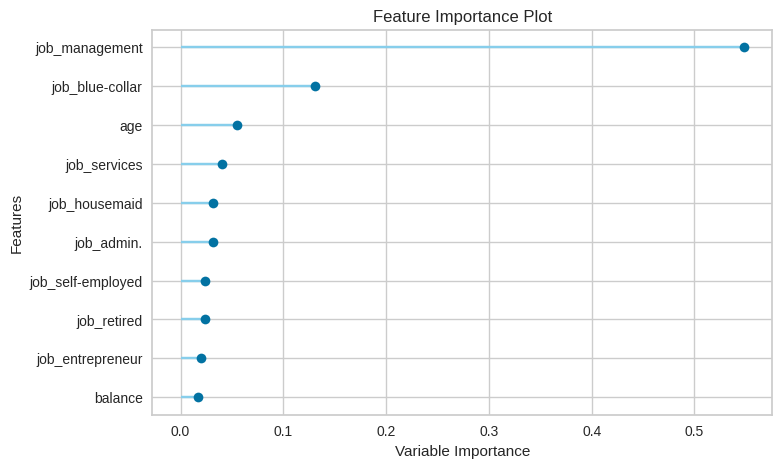

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

*Check docstring to see available plo*ts

In [13]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

*The predict_model function returns prediction_label and prediction_score (probability of the predicted class) as new columns in dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.*

*Prediction on test set*

In [15]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6870,0.8306,0.6870,0.6766,0.6634,0.4577,0.4709


Show predictions

In [16]:
holdout_pred.head()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,education,prediction_label,prediction_score
11686,57,entrepreneur,married,no,0,yes,yes,unknown,20,jun,512,2,-1,0,unknown,no,tertiary,secondary,0.3890
38642,33,management,married,no,1423,yes,no,cellular,15,may,333,2,364,3,failure,no,secondary,tertiary,0.8786
26601,53,technician,divorced,no,6503,yes,no,cellular,20,nov,143,1,-1,0,unknown,no,tertiary,secondary,0.6994
19167,51,services,married,no,434,no,no,cellular,5,aug,513,2,-1,0,unknown,no,secondary,secondary,0.7760
45016,40,management,married,no,0,no,no,cellular,14,oct,1410,3,-1,0,unknown,no,tertiary,tertiary,0.8235


*The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the Class variable. We can then use the new data frame without labels for scoring.*



*Copy data and drop Class variable*

In [17]:
new_data = data.copy()
new_data.drop('education', axis=1, inplace=True)
new_data.head()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


*Predict model on new_data*

In [18]:
predictions = predict_model(best, data = new_data)
predictions.head()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
0,58,management,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,tertiary,0.5935
1,44,technician,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,secondary,0.6894
2,33,entrepreneur,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,tertiary,0.4454
3,47,blue-collar,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,secondary,0.4639
4,33,unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,unknown,0.3729


## Save Model
*You can save the entire pipeline on disk for later use, using pycaret's save_model function.*

In [19]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',

In [20]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_valu...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

*To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use get_config method.*

In [21]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,job_self-employed,job_services,job_admin.,job_blue-collar,job_management,job_technician,job_unemployed,job_entrepreneur,job_student,...,month_dec,duration,campaign,pdays,previous,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,deposit
5252,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,121.0,2.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
35765,43.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
19054,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
35351,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,448.0,2.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
38104,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.0,6.0,373.0,2.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,407.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
3771,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,225.0,4.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
29650,37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,586.0,3.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
3355,55.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,176.0,18.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


*All the preprocessing configurations and experiment settings/parameters are passed into the setup function. To see all available parameters, check the docstring. Here init setup with normalize true*

In [24]:
s = setup(data, target = 'education', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,education
2,Target type,Multiclass
3,Target mapping,"primary: 0, secondary: 1, tertiary: 2, unknown: 3"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 46)"
6,Transformed train set shape,"(31647, 46)"
7,Transformed test set shape,"(13564, 46)"
8,Numeric features,7
9,Categorical features,9


**X_train_transformed** : _This represents the original training dataset containing features (input variables) used to train a machine learning model and
transformed indicates that some transformation or preprocessing has been applied to X_train_

*Notice that all the values are between 0 and 1 - that is because we passed normalize=True in the setup function.*

<Axes: >

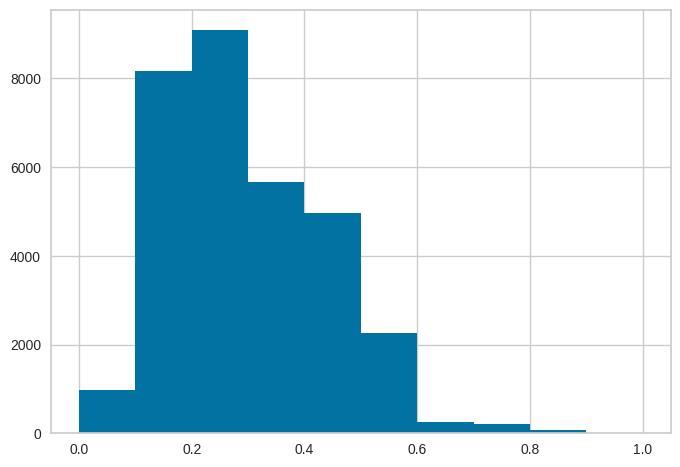

In [25]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

*We can also access non-transformed values using get_config and then compare. *

<Axes: >

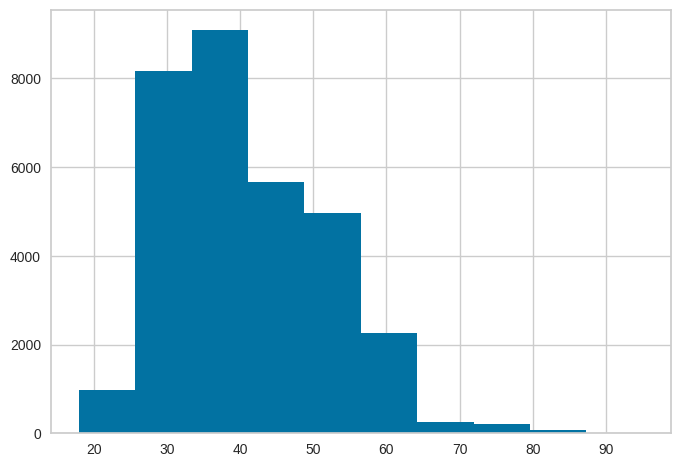

In [26]:
get_config('X_train')['age'].hist()

In [27]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6853,0.0000,0.6853,0.6711,0.6627,0.4567,0.4687,21.1090
lightgbm,Light Gradient Boosting Machine,0.6849,0.8298,0.6849,0.6701,0.6645,0.4606,0.4696,5.2480
lr,Logistic Regression,0.6835,0.0000,0.6835,0.6696,0.6588,0.4524,0.4647,2.7140
xgboost,Extreme Gradient Boosting,0.6810,0.8245,0.6810,0.6650,0.6617,0.4562,0.4638,3.1120
ridge,Ridge Classifier,0.6789,0.0000,0.6789,0.6543,0.6372,0.4314,0.4527,0.5780
ada,Ada Boost Classifier,0.6769,0.0000,0.6769,0.6647,0.6621,0.4566,0.4612,2.0180
rf,Random Forest Classifier,0.6747,0.8158,0.6747,0.6584,0.6548,0.4453,0.4528,6.5820
svm,SVM - Linear Kernel,0.6738,0.0000,0.6738,0.6463,0.6304,0.4196,0.4436,1.5140
lda,Linear Discriminant Analysis,0.6717,0.0000,0.6717,0.6694,0.6684,0.4656,0.4670,0.8500
et,Extra Trees Classifier,0.6555,0.7987,0.6555,0.6364,0.6411,0.4230,0.4264,7.0370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

_Compare_models by default uses all the estimators in model library (all except models with Turbo=False) . To see all available models you can use the function models()_

In [28]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [30]:
!pip install catboost
!pip install --upgrade pycaret[full]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with

In [11]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6853,0.0000,0.6853,0.6712,0.6627,0.4566,0.4687,21.2120
lightgbm,Light Gradient Boosting Machine,0.6845,0.8299,0.6845,0.6695,0.6638,0.4595,0.4686,5.8990
catboost,CatBoost Classifier,0.6838,0.8287,0.6838,0.6691,0.6642,0.4605,0.4685,28.0220
xgboost,Extreme Gradient Boosting,0.6810,0.8245,0.6810,0.6650,0.6617,0.4562,0.4638,3.2740
rf,Random Forest Classifier,0.6743,0.8159,0.6743,0.6584,0.6545,0.4446,0.4521,6.6260
et,Extra Trees Classifier,0.6554,0.7987,0.6554,0.6362,0.6409,0.4228,0.4262,6.8810
dt,Decision Tree Classifier,0.5601,0.6505,0.5601,0.5641,0.5620,0.3009,0.3010,1.1160


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [12]:
compare_tree_models

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6853,0.0000,0.6853,0.6712,0.6627,0.4566,0.4687,21.212
lightgbm,Light Gradient Boosting Machine,0.6845,0.8299,0.6845,0.6695,0.6638,0.4595,0.4686,5.899
catboost,CatBoost Classifier,0.6838,0.8287,0.6838,0.6691,0.6642,0.4605,0.4685,28.022
xgboost,Extreme Gradient Boosting,0.6810,0.8245,0.6810,0.6650,0.6617,0.4562,0.4638,3.274
rf,Random Forest Classifier,0.6743,0.8159,0.6743,0.6584,0.6545,0.4446,0.4521,6.626
et,Extra Trees Classifier,0.6554,0.7987,0.6554,0.6362,0.6409,0.4228,0.4262,6.881
dt,Decision Tree Classifier,0.5601,0.6505,0.5601,0.5641,0.5620,0.3009,0.3010,1.116


In [14]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6853,0.0000,0.6853,0.6712,0.6627,0.4566,0.4687,20.9280
lightgbm,Light Gradient Boosting Machine,0.6845,0.8299,0.6845,0.6695,0.6638,0.4595,0.4686,5.5800
catboost,CatBoost Classifier,0.6838,0.8287,0.6838,0.6691,0.6642,0.4605,0.4685,27.6160
xgboost,Extreme Gradient Boosting,0.6810,0.8245,0.6810,0.6650,0.6617,0.4562,0.4638,3.0440
ridge,Ridge Classifier,0.6788,0.0000,0.6788,0.6541,0.6371,0.4312,0.4526,0.7220
ada,Ada Boost Classifier,0.6769,0.0000,0.6769,0.6647,0.6621,0.4566,0.4612,1.9740
rf,Random Forest Classifier,0.6743,0.8159,0.6743,0.6584,0.6545,0.4446,0.4521,6.1090
lda,Linear Discriminant Analysis,0.6717,0.0000,0.6717,0.6694,0.6684,0.4656,0.4670,0.8370
et,Extra Trees Classifier,0.6554,0.7987,0.6554,0.6362,0.6409,0.4228,0.4262,6.6040
lr,Logistic Regression,0.6399,0.0000,0.6399,0.5964,0.5768,0.3359,0.3778,9.8050


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [33]:
# list of top 3 models by Recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

**Create Model**: *This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.*

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [16]:
from pycaret.classification import *
s = setup(data, target = 'education', log_experiment='mlflow', experiment_name='bank_experiment')

,Description,Value
0,Session id,6073
1,Target,education
2,Target type,Multiclass
3,Target mapping,"primary: 0, secondary: 1, tertiary: 2, unknown: 3"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 46)"
6,Transformed train set shape,"(31647, 46)"
7,Transformed test set shape,"(13564, 46)"
8,Numeric features,7
9,Categorical features,9


2024/09/20 19:57:49 INFO mlflow.tracking.fluent: Experiment with name 'bank_experiment' does not exist. Creating a new experiment.


*The function below returns a trained model object as an output. The scoring grid is only displayed and not returned*.

In [17]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6284,0.0000,0.6284,0.5747,0.5789,0.3284,0.3545
1,0.6335,0.0000,0.6335,0.5891,0.5746,0.3283,0.3636
2,0.6464,0.0000,0.6464,0.5938,0.5751,0.3374,0.3945
3,0.6389,0.0000,0.6389,0.5906,0.5922,0.3514,0.3756
4,0.6461,0.0000,0.6461,0.6134,0.5805,0.3469,0.3885
5,0.6234,0.0000,0.6234,0.5904,0.5536,0.2906,0.3465
6,0.6294,0.0000,0.6294,0.5813,0.5818,0.3332,0.3569
7,0.6391,0.0000,0.6391,0.6059,0.5771,0.3283,0.3781
8,0.6365,0.0000,0.6365,0.5937,0.5908,0.3436,0.3717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/09/20 19:59:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [18]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6284,0.0,0.6284,0.5747,0.5789,0.3284,0.3545
1,0.6335,0.0,0.6335,0.5891,0.5746,0.3283,0.3636
2,0.6464,0.0,0.6464,0.5938,0.5751,0.3374,0.3945
3,0.6389,0.0,0.6389,0.5906,0.5922,0.3514,0.3756
4,0.6461,0.0,0.6461,0.6134,0.5805,0.3469,0.3885
5,0.6234,0.0,0.6234,0.5904,0.5536,0.2906,0.3465
6,0.6294,0.0,0.6294,0.5813,0.5818,0.3332,0.3569
7,0.6391,0.0,0.6391,0.6059,0.5771,0.3283,0.3781
8,0.6365,0.0,0.6365,0.5937,0.5908,0.3436,0.3717


In [19]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6381,0.0000,0.6381,0.5996,0.5874,0.3465,0.3744
1,0.6406,0.0000,0.6406,0.6029,0.5854,0.3478,0.3769
2,0.6395,0.0000,0.6395,0.6576,0.5683,0.3256,0.3776
Mean,0.6394,0.0000,0.6394,0.6200,0.5804,0.3399,0.3763
Std,0.0010,0.0000,0.0010,0.0266,0.0086,0.0102,0.0014


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/09/20 20:01:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [20]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6427,0.0000,0.6427,0.6022,0.5874,0.3534,0.3807
1,0.6389,0.0000,0.6389,0.5973,0.5955,0.3533,0.3762
2,0.6420,0.0000,0.6420,0.5946,0.5908,0.3523,0.3807
3,0.6341,0.0000,0.6341,0.5911,0.5911,0.3428,0.3679
4,0.6430,0.0000,0.6430,0.6118,0.5825,0.3468,0.3821
5,0.6265,0.0000,0.6265,0.5920,0.5742,0.3241,0.3511
6,0.6332,0.0000,0.6332,0.5784,0.5714,0.3286,0.3617
7,0.6346,0.0000,0.6346,0.6006,0.5737,0.3294,0.3662
8,0.6312,0.0000,0.6312,0.5644,0.5628,0.3136,0.3590


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/09/20 20:04:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6073, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*The results of training a logistic regression model with custom parameters (C=0.5, l1_ratio=0.15). The model has been evaluated using 10-fold cross-validation, and the mean accuracy across folds is 94.18%. Other performance metrics like precision, recall, and F1 score are also high, indicating strong performance in this specific classification task. However, the AUC metric is zero, which may indicate an issue with the dataset or evaluation method used.*

** Tune Model**: *This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the get_metrics function.*

*Train a dt model with default params*

In [21]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5580,0.6505,0.5580,0.5629,0.5602,0.2996,0.2997
1,0.5586,0.6503,0.5586,0.5642,0.5613,0.3000,0.3001
2,0.5744,0.6647,0.5744,0.5805,0.5773,0.3256,0.3257
3,0.5684,0.6604,0.5684,0.5737,0.5708,0.3179,0.3181
4,0.5684,0.6532,0.5684,0.5738,0.5707,0.3097,0.3099
5,0.5637,0.6515,0.5637,0.5664,0.5649,0.3023,0.3024
6,0.5668,0.6557,0.5668,0.5708,0.5688,0.3113,0.3114
7,0.5724,0.6587,0.5724,0.5737,0.5730,0.3182,0.3182
8,0.5651,0.6537,0.5651,0.5682,0.5666,0.3082,0.3082


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/09/20 20:04:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


*Tune hyperparameters of dt*

In [22]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6692,0.7824,0.6692,0.6548,0.6486,0.4284,0.4438
1,0.6664,0.7952,0.6664,0.6488,0.6461,0.4249,0.4385
2,0.6806,0.7985,0.6806,0.6658,0.6602,0.4486,0.4641
3,0.6708,0.7896,0.6708,0.6526,0.6515,0.4347,0.4470
4,0.6733,0.7968,0.6733,0.6553,0.6521,0.4355,0.4504
5,0.6581,0.7821,0.6581,0.6402,0.6366,0.4088,0.4233
6,0.6591,0.7899,0.6591,0.6447,0.6388,0.4116,0.4261
7,0.6726,0.7954,0.6726,0.6575,0.6511,0.4320,0.4486
8,0.6536,0.7858,0.6536,0.6371,0.6320,0.4006,0.4155


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/09/20 20:06:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


*Metric to optimize can be defined in optimize parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with custom_grid parameter.*

In [23]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=6073, splitter='best')

In [24]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6682,0.7961,0.6682,0.6595,0.6518,0.4362,0.4436
1,0.6761,0.7985,0.6761,0.6715,0.6572,0.4432,0.4547
2,0.6951,0.8154,0.6951,0.6857,0.6791,0.4810,0.4904
3,0.6812,0.7990,0.6812,0.6753,0.6633,0.4549,0.4638
4,0.6806,0.8059,0.6806,0.6891,0.6558,0.4480,0.4602
5,0.6651,0.7901,0.6651,0.6377,0.6416,0.4206,0.4332
6,0.6651,0.7924,0.6651,0.6517,0.6475,0.4280,0.4369
7,0.6757,0.7966,0.6757,0.6605,0.6558,0.4427,0.4540
8,0.6634,0.7933,0.6634,0.6498,0.6447,0.4234,0.4328


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


2024/09/20 20:19:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [51]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9878,0.9091,0.9318,0.9091,0.8642,0.8750
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/09/20 17:03:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [52]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=4282, splitter='best')

In [53]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['sepal_length',
                                                                          'sepal_width',
                                                                          'p...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=4282, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

*The default search algorithm is RandomizedSearchCV from sklearn. This can be changed by using search_library and search_algorithm parameter.*

In [54]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8182,0.9756,0.8182,0.8909,0.8106,0.7317,0.7695
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 105 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/09/20 17:04:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**Ensemble Model** : *This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.*



In [25]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6464,0.7855,0.6464,0.6360,0.6365,0.4147,0.4166
1,0.6455,0.7883,0.6455,0.6329,0.6357,0.4139,0.4160
2,0.6632,0.7969,0.6632,0.6495,0.6518,0.4422,0.4443
3,0.6427,0.7811,0.6427,0.6315,0.6331,0.4142,0.4152
4,0.6600,0.7922,0.6600,0.6473,0.6494,0.4357,0.4380
5,0.6430,0.7718,0.6430,0.6366,0.6324,0.4042,0.4073
6,0.6376,0.7776,0.6376,0.6265,0.6275,0.3989,0.4012
7,0.6596,0.7879,0.6596,0.6526,0.6489,0.4340,0.4368
8,0.6432,0.7853,0.6432,0.6310,0.6340,0.4145,0.4155


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/09/20 20:49:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=6073,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=6073, verbose=0,
                  warm_start=False)

In [56]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/09/20 17:06:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=4282,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=4282)

**Blend Models** : *This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function.*

In [57]:
# top 3 models based on recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

In [58]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,1.0000,0.9000,0.9250,0.9000,0.8507,0.8636
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/09/20 17:24:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


VotingClassifier(estimators=[('Quadratic Discriminant Analysis',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covariance_estimator=None,
                                                         n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform'))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

**Stack Models** :_This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function._

In [59]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/09/20 17:25:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


StackingClassifier(cv=5,
                   estimators=[('Quadratic Discriminant Analysis',
                                QuadraticDiscriminantAnalysis(priors=None,
                                                              reg_param=0.0,
                                                              store_covariance=False,
                                                              tol=0.0001)),
                               ('Linear Discriminant Analysis',
                                LinearDiscriminantAnalysis(covariance_estimator=None,
                                                           n_components=None,
                                                           priors=None,
                                                           shrinkage=None,
                                                           solver='svd',
                                                           store_covariance=False,
                                                           tol=0.0001)),
                               ('K Neighbors...
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform'))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=4282,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

 **Plot Model** : *This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.*

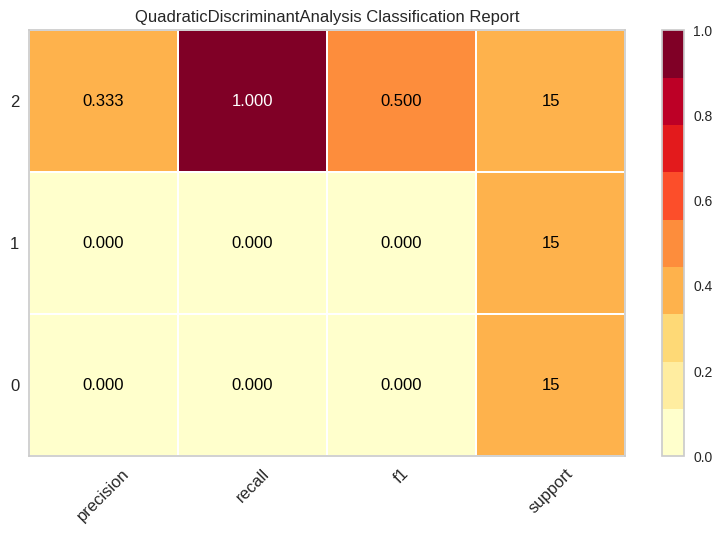

In [60]:
# plot class report
plot_model(best, plot = 'class_report')

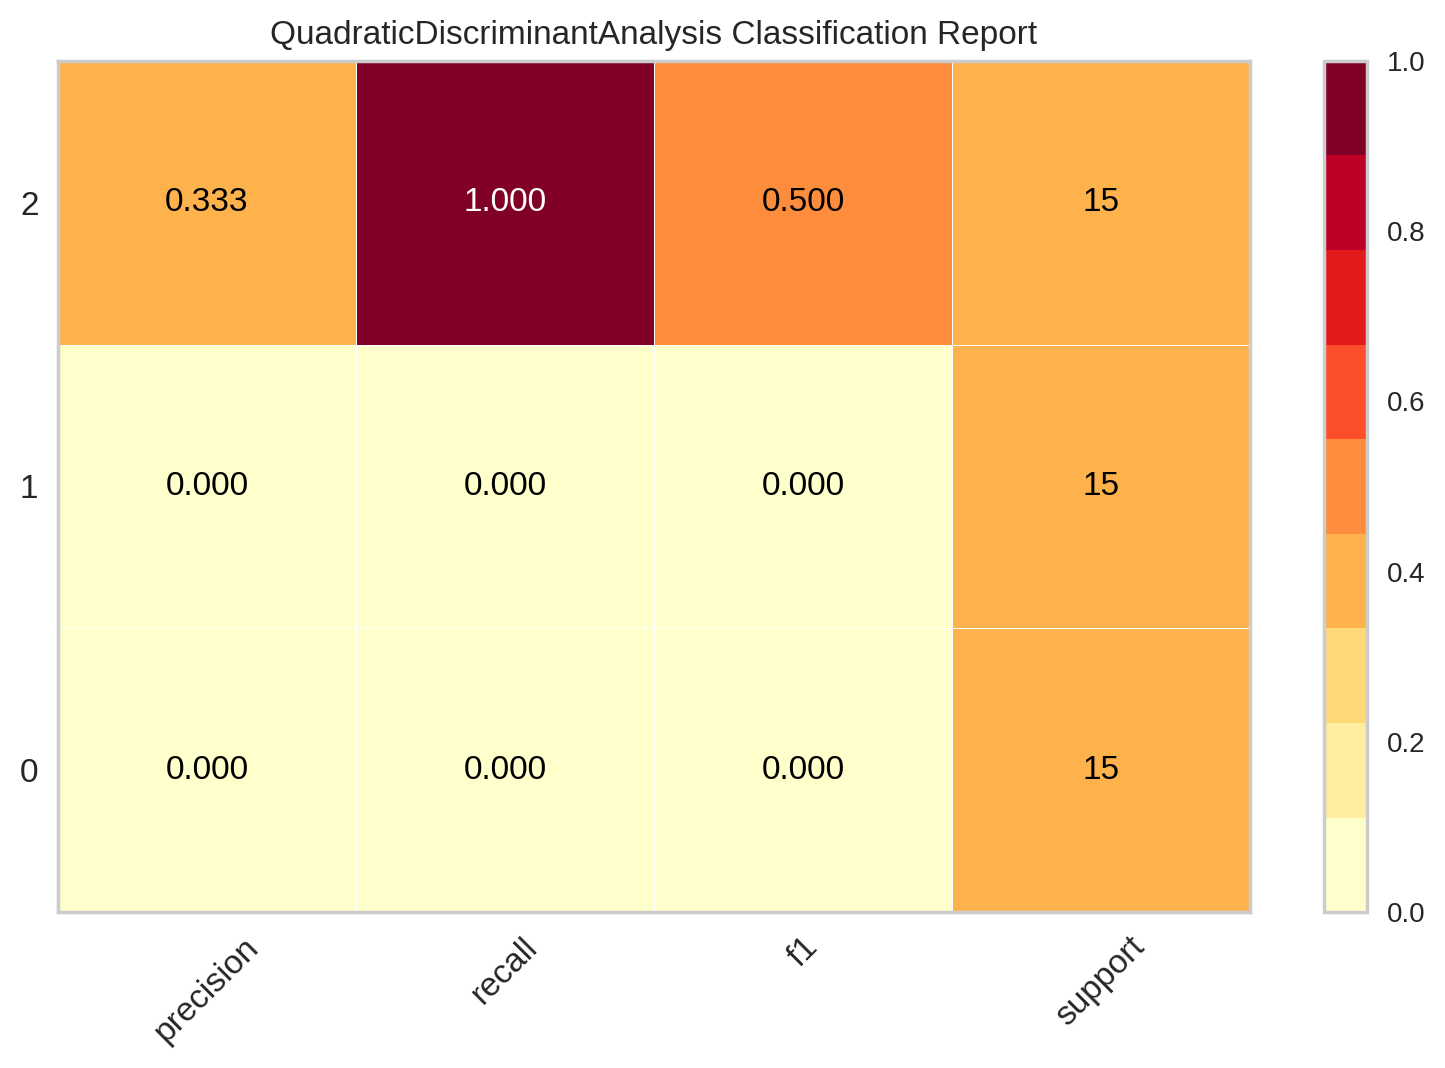

In [61]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [62]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

 **Interpret Model** : *This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations).*

In [63]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.9091,1.0000,0.9091,0.9273,0.9051,0.8608,0.8721
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9091,1.0000,0.9091,0.9273,0.9051,0.8608,0.8721
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9690,0.9000,0.9250,0.9000,0.8507,0.8636
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/09/20 17:50:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


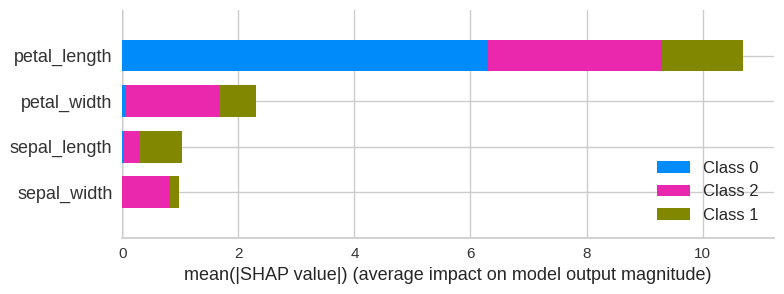

In [64]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

** Get Leaderboard :** *This function returns the leaderboard of all models trained in the current setup.*

In [65]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/18 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9418,0.0000,0.9418,0.9601,0.9372,0.9115,0.9232
1,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9524,0.0000,0.9524,0.9608,0.9515,0.9283,0.9331
2,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9418,0.0000,0.9418,0.9601,0.9372,0.9115,0.9232
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9709,0.9762,0.9709,0.9794,0.9675,0.9548,0.9609
4,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9709,0.9821,0.9709,0.9798,0.9679,0.9552,0.9612
5,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9709,0.9762,0.9709,0.9794,0.9675,0.9548,0.9609
6,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9709,0.9762,0.9709,0.9794,0.9675,0.9548,0.9609
7,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9709,0.9762,0.9709,0.9794,0.9675,0.9548,0.9609
8,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9709,0.9821,0.9709,0.9798,0.9679,0.9552,0.9612
